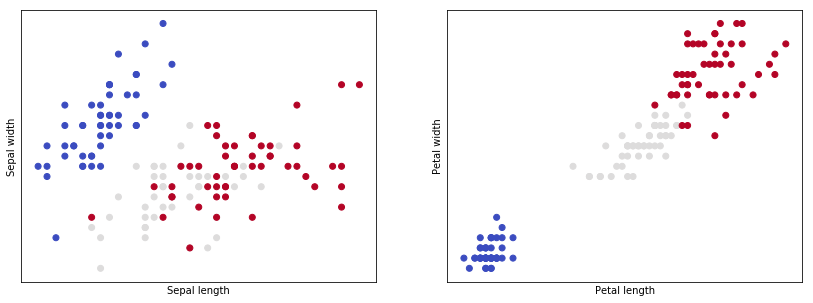

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

dataset = load_iris()
X = dataset.data
y = dataset.target

plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())

plt.subplot(1, 2, 2)
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.xticks(())
plt.yticks(())
plt.show()

print(dataset.feature_names)

linear :
Error on test set: 0.2
Error on train set: 0.2

linear :
Error on test set: 0.1
Error on train set: 0.016666666666666666

rbf :
Error on test set: 0.26666666666666666
Error on train set: 0.15833333333333333

rbf :
Error on test set: 0.0
Error on train set: 0.03333333333333333

poly :
Error on test set: 0.23333333333333334
Error on train set: 0.18333333333333332

poly :
Error on test set: 0.06666666666666667
Error on train set: 0.03333333333333333



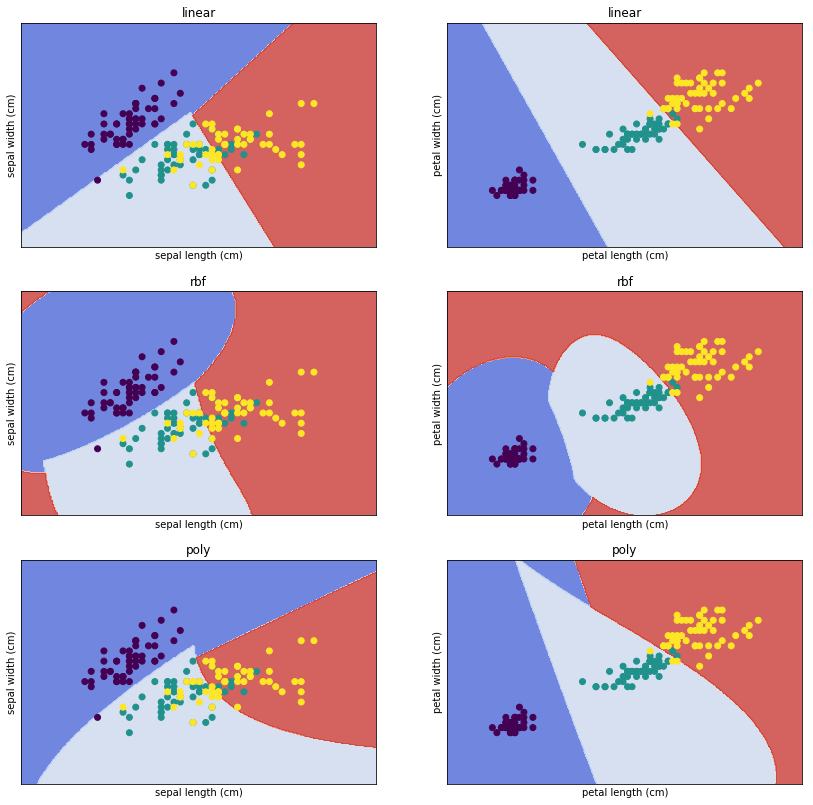

In [12]:
from sklearn.svm import SVC

plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(14, 14))

def viz(X, ker):
    global y
    
    h = .02
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

    clf = SVC(kernel=ker, C=1., gamma='auto')
    clf.fit(X_train, y_train)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xticks(())
    plt.yticks(())
    plt.title(ker)
    
    print(ker, ':')
    print('Error on test set:', mean_squared_error(y_test, clf.predict(X_test)))
    print('Error on train set:', mean_squared_error(y_train, clf.predict(X_train)))
    print()
    
    return clf
    
    
plt.subplot(3, 2, 1)
slin = viz(dataset.data[:, :2], 'linear')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.subplot(3, 2, 2)
plin = viz(dataset.data[:, 2:], 'linear')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.subplot(3, 2, 3)
srbf = viz(dataset.data[:, :2], 'rbf')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.subplot(3, 2, 4)
prbf = viz(dataset.data[:, 2:], 'rbf')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.subplot(3, 2, 5)
spoly = viz(dataset.data[:, :2], 'poly')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.subplot(3, 2, 6)
ppoly = viz(dataset.data[:, 2:], 'poly')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.show()